In [2]:
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection
from shapely.geometry import Polygon, MultiPolygon, LineString
from shapely.ops import unary_union
import ast

In [3]:
# Load old triangles
old_triangles = []
with open("triangles_halde_outer_polygon_layer_10.txt", "r") as f:
    for line in f:
        triangle = ast.literal_eval(line.strip())
        # convert triangle to shapely polygon
        triangle = Polygon(triangle)
        old_triangles.append(triangle)

In [5]:
print("Number of Old Triangles: ", len(old_triangles))

Number of Old Triangles:  15394


In [4]:
# Make old triangles into a Multi Polygon
multi = unary_union(old_triangles)    

In [5]:
# Load new triangles
delaunay_triangles = []
with open("halde_new_edges_layer_10_pix.txt", "r") as f:
    for line in f:
        triangle = ast.literal_eval(line.strip())
        delaunay_triangles.append(triangle)

In [8]:
print("Number of Delaunay Triangles: ", len(delaunay_triangles))

Number of Delaunay Triangles:  9131


In [6]:
# contains test
new_triangles = []
poly_newtri = []
poly_deltri = []

for tri in delaunay_triangles:
    # convert triangle to shapely polygon
    triangle = Polygon(tri)
    poly_deltri.append(triangle)
    # check intersects?

    if multi.contains(triangle):
        new_triangles.append(tri) # append the (list) triangle
        poly_newtri.append(triangle) # append the polygon triangle

print("Number of Delaunay Triangles (after contains test): ", len(new_triangles))



Number of Delaunay Triangles (after contains test):  7863


In [8]:
# contains OR overlaps test
co_new_triangles = []
co_poly_newtri = []
co_poly_deltri = []

for tri in delaunay_triangles:
    # convert triangle to shapely polygon
    co_triangle = Polygon(tri)
    co_poly_deltri.append(co_triangle)
    # check intersects?

    if multi.contains(co_triangle) or co_triangle.overlaps(multi):
        co_new_triangles.append(tri) # append the (list) triangle
        co_poly_newtri.append(co_triangle) # append the polygon triangle

print("Number of Delaunay Triangles (after contains OR overlaps test): ", len(co_new_triangles))



Number of Delaunay Triangles (after contains OR overlaps test):  7905


In [8]:
# make multi poly out of new triangles to plot
new_multi = unary_union(poly_newtri)    

In [9]:
def plotMultipolygon(delaunayPoly, oldPoly, xlim, ylim):
    # get interior/exterior rings
    def extract_rings(obj):
        rings = []
        # single polygon
        if isinstance(obj, Polygon):
            rings.append(obj.exterior)
            rings.extend(obj.interiors)
        # multipolygon
        elif isinstance(obj, MultiPolygon):
            for poly in obj.geoms:
                rings.append(poly.exterior)
                rings.extend(poly.interiors)
        # list of polygons/multipolygons
        else:
            try:
                for item in obj:
                    rings.extend(extract_rings(item))
            except TypeError:
                pass
        return rings

    fig, ax = plt.subplots(figsize=(20, 20))

    # plot delaunay triangles in blue
    d_rings = extract_rings(delaunayPoly)
    for i, ring in enumerate(d_rings):
        x, y = ring.xy
        ax.plot(x, y,
                color='blue',
                linewidth=2,
                label='Delaunay triangles' if i == 0 else "")

    # plot original polygon boundary in red dashed
    o_rings = extract_rings(oldPoly)
    for i, ring in enumerate(o_rings):
        x, y = ring.xy
        ax.plot(x, y,
                color='red',
                linestyle='--',
                linewidth=2,
                label='Old polygon boundary' if i == 0 else "")

    # formatting
    ax.set_title("Multipoly Visualization")
    ax.set_aspect('equal')
    ax.set_xlim(xlim[0], xlim[1])
    ax.set_ylim(ylim[0], ylim[1])
    ax.grid(True)
    ax.legend()
    plt.show()

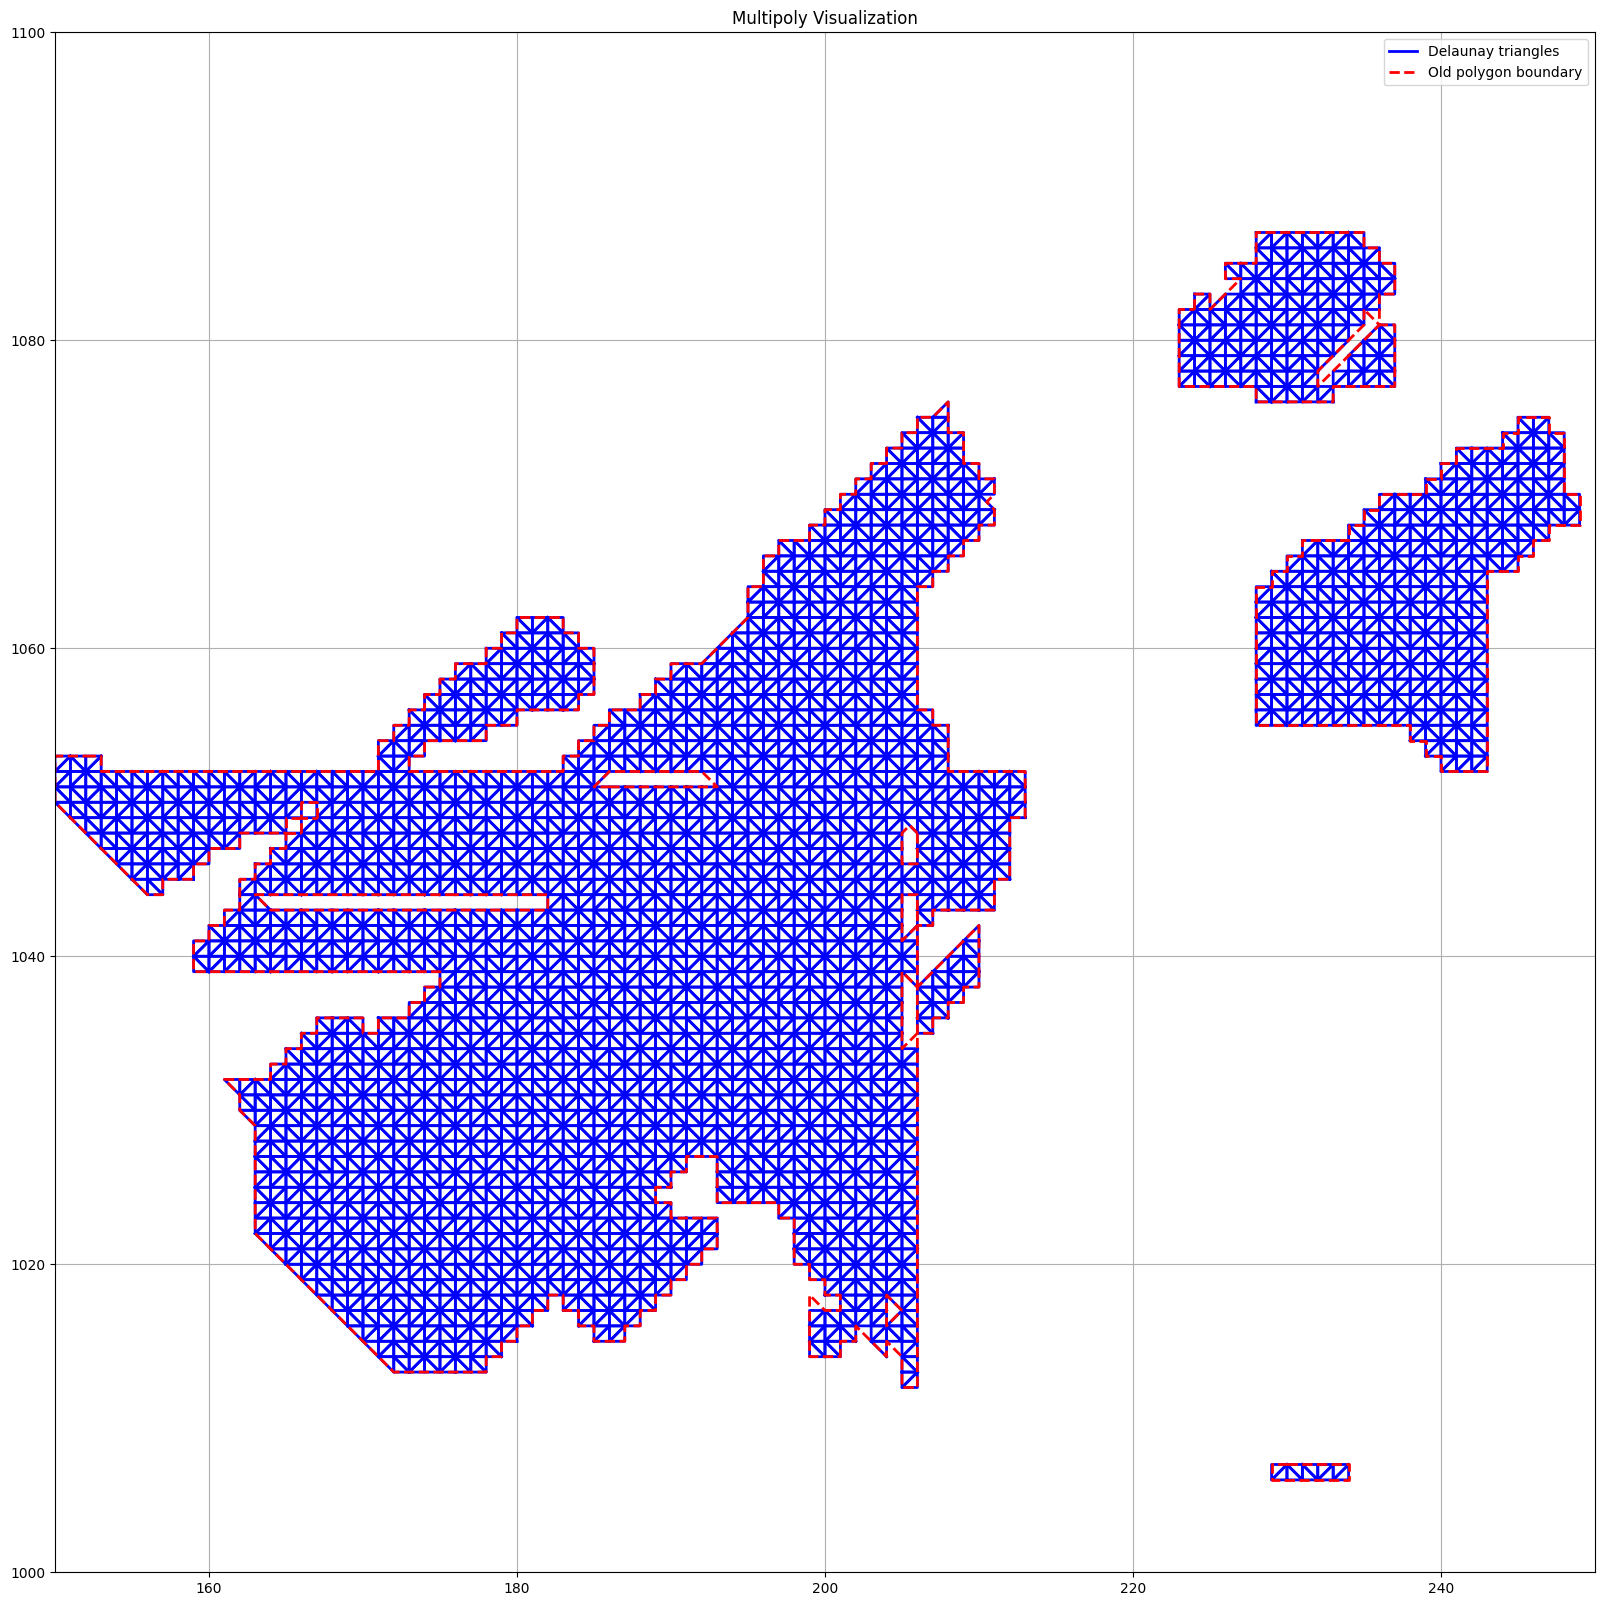

In [10]:
# plot contains result
plotMultipolygon(poly_newtri, multi, (150,250), (1000,1100))

c:\Users\22che\SURP2024\simplification\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


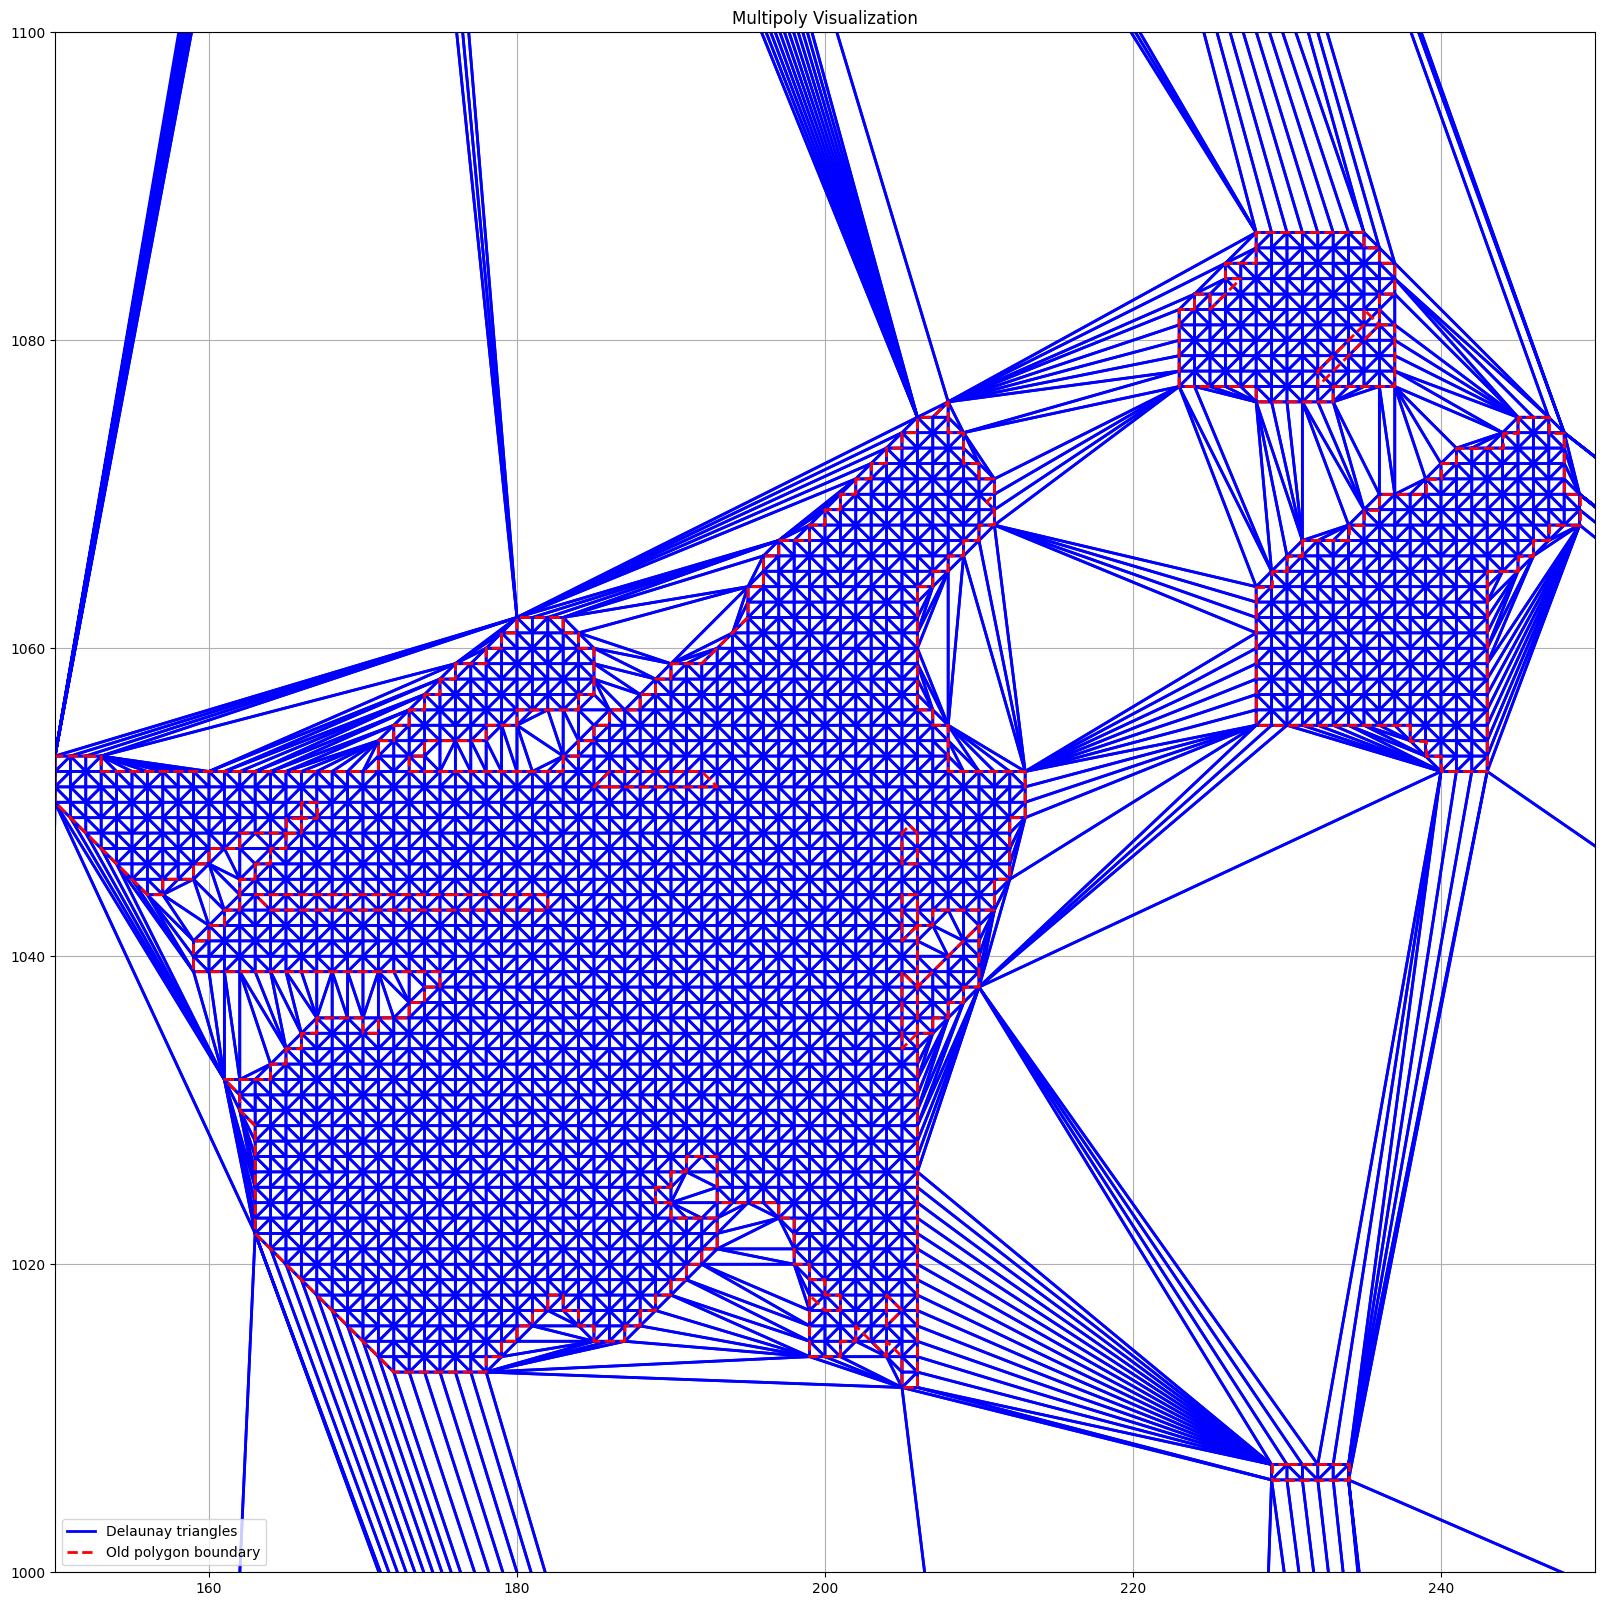

In [11]:
# plot original
plotMultipolygon(poly_deltri, multi, (150,250), (1000,1100))

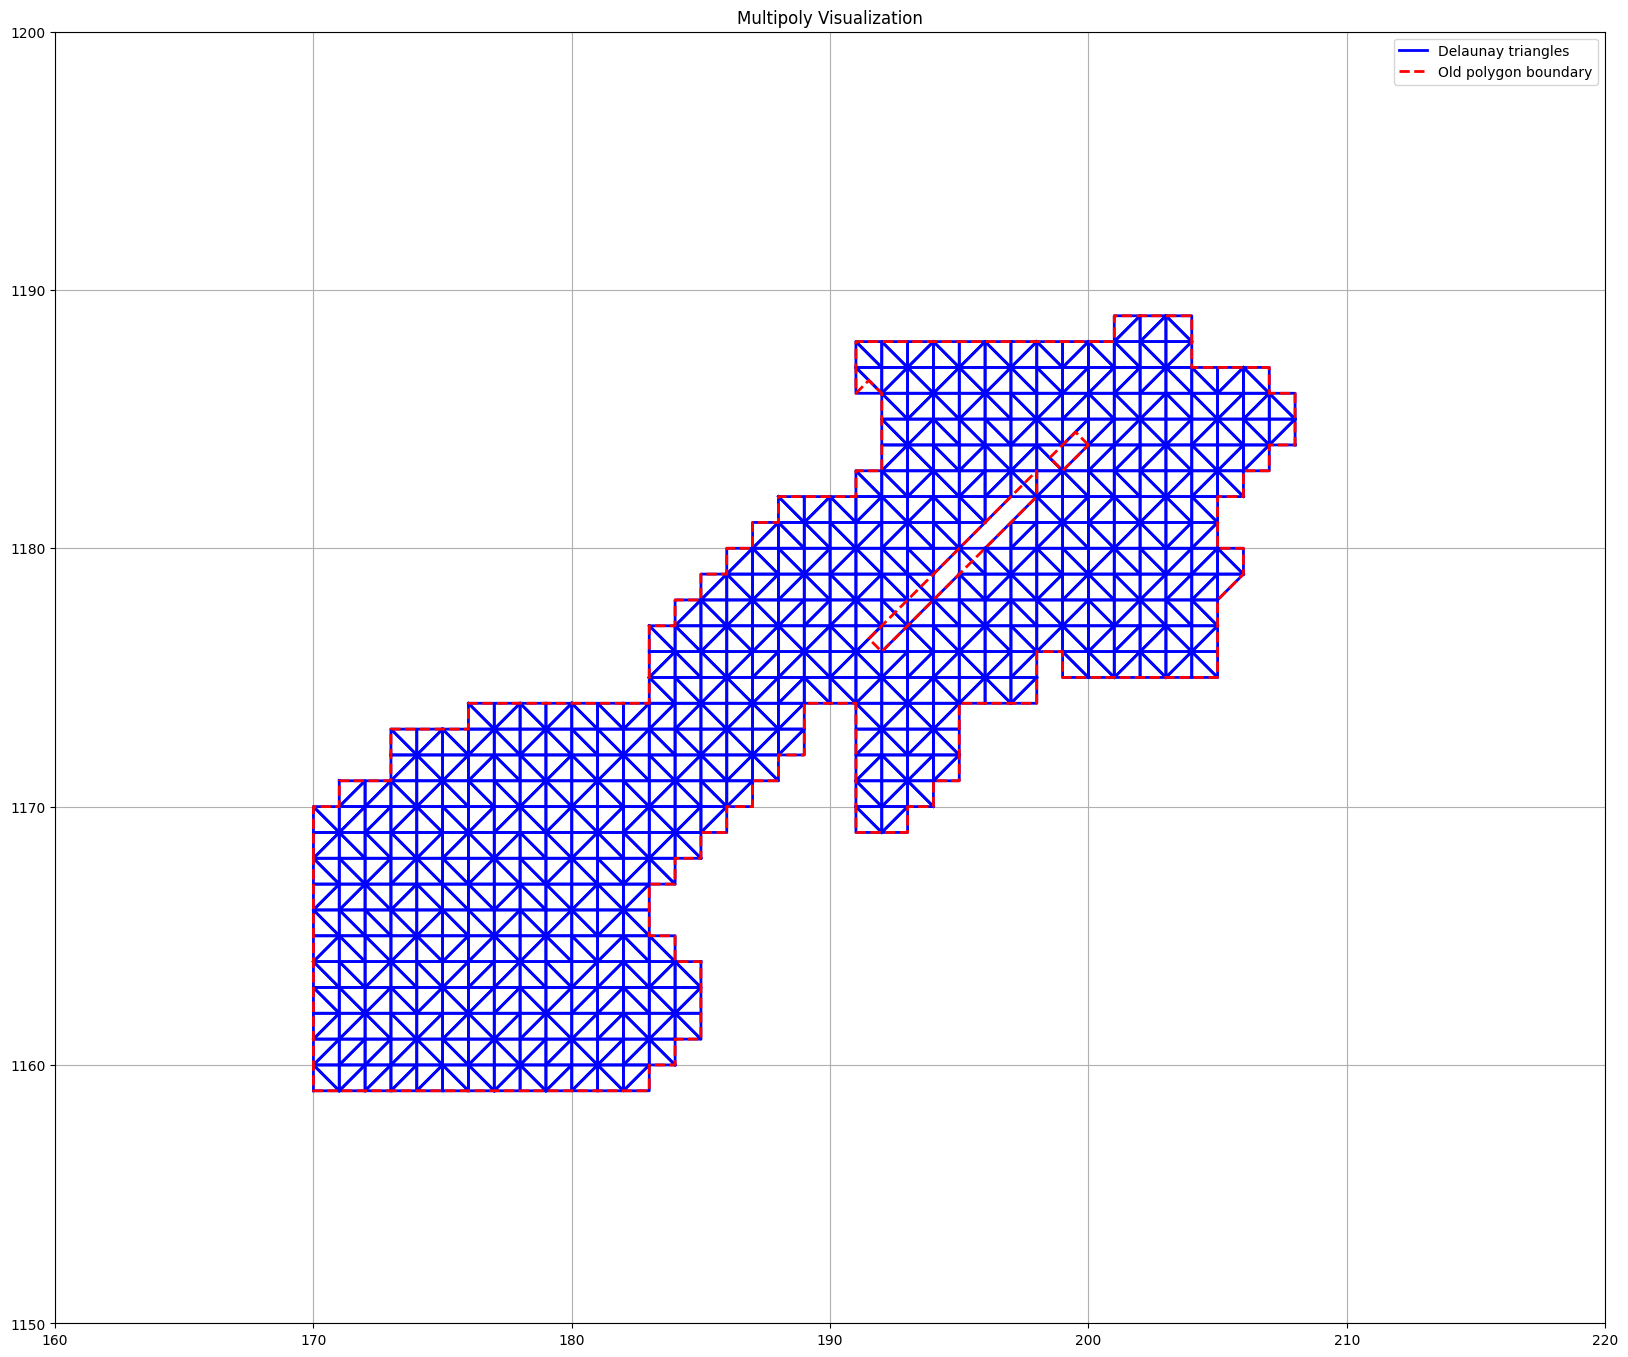

In [15]:
# plot contains OR overlap result
plotMultipolygon(co_poly_newtri, multi, (160,220), (1150,1200))

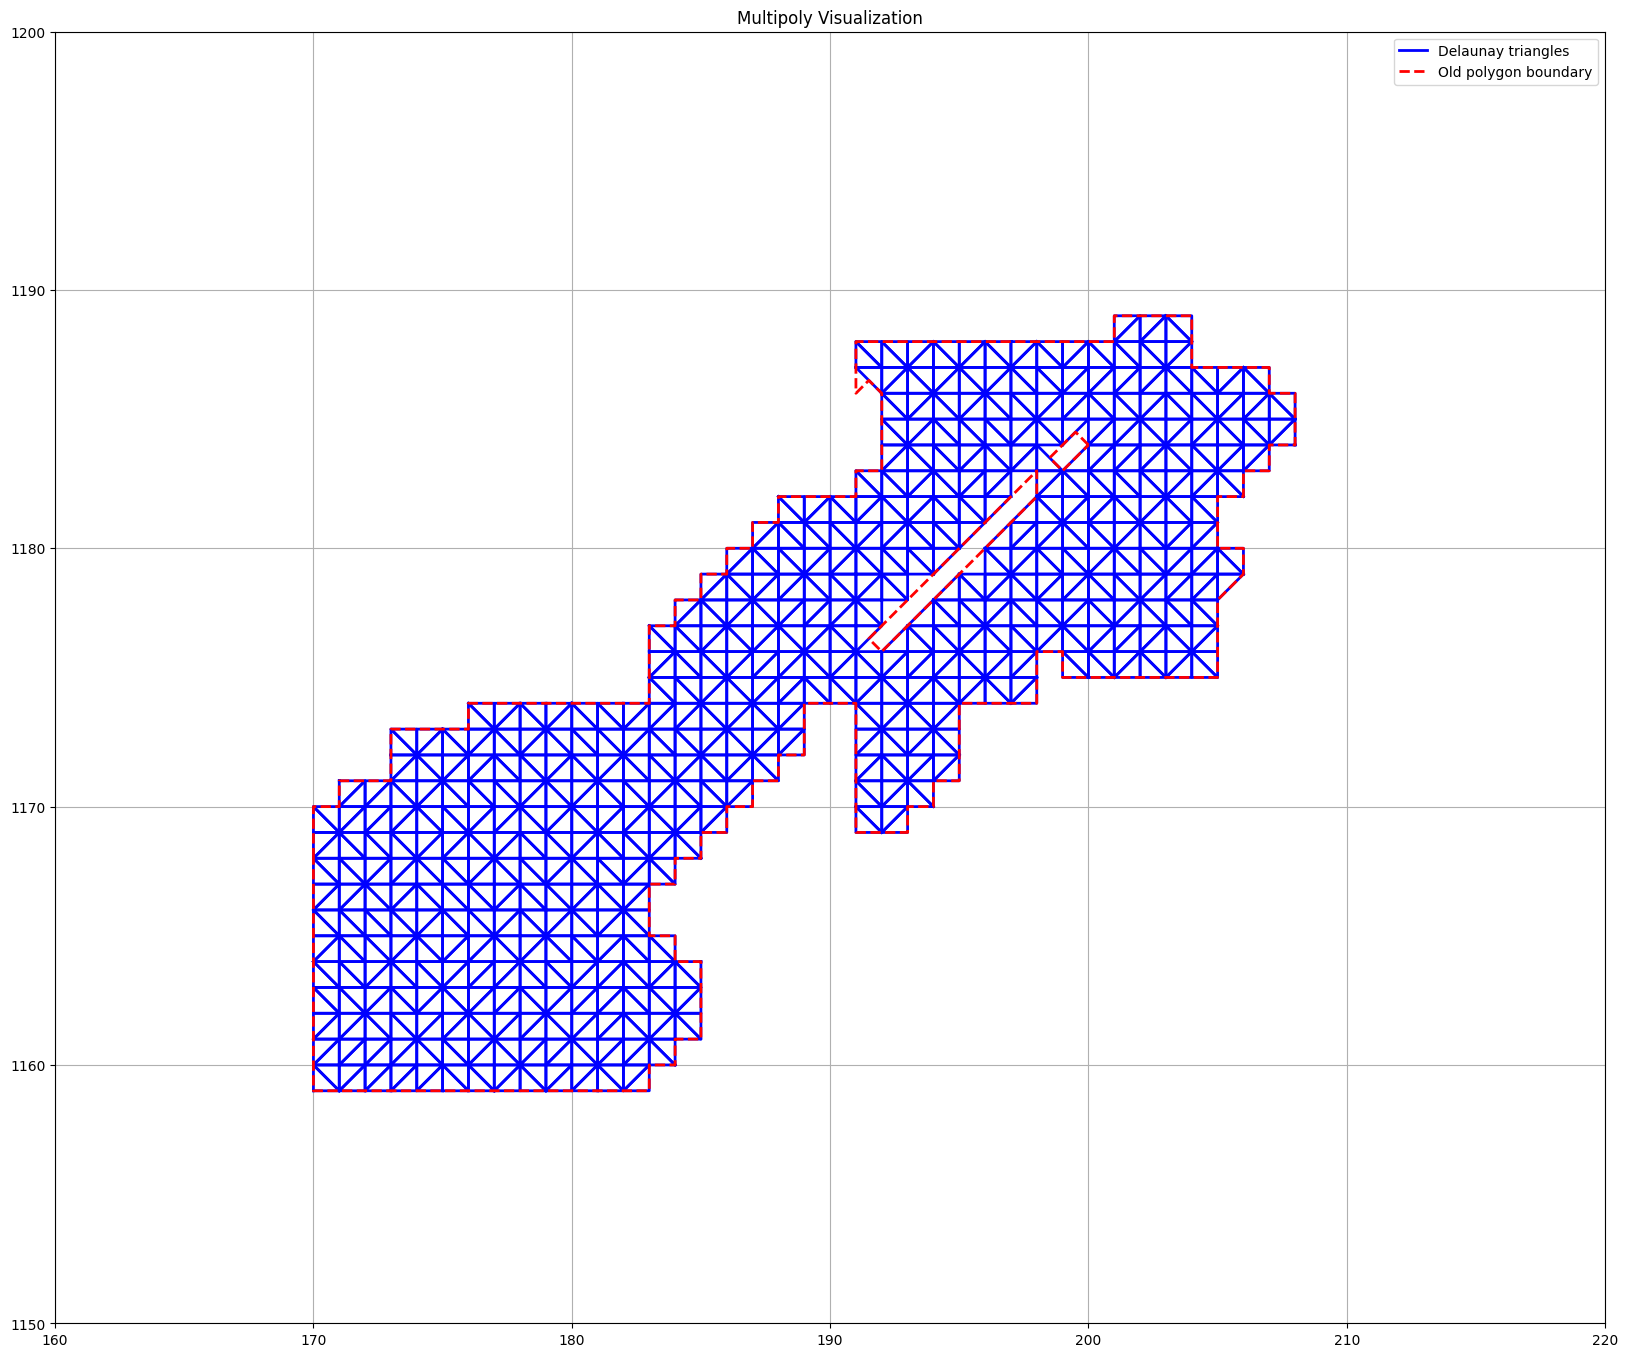

In [12]:
# plot contains result
plotMultipolygon(poly_newtri, multi, (160,220), (1150,1200))

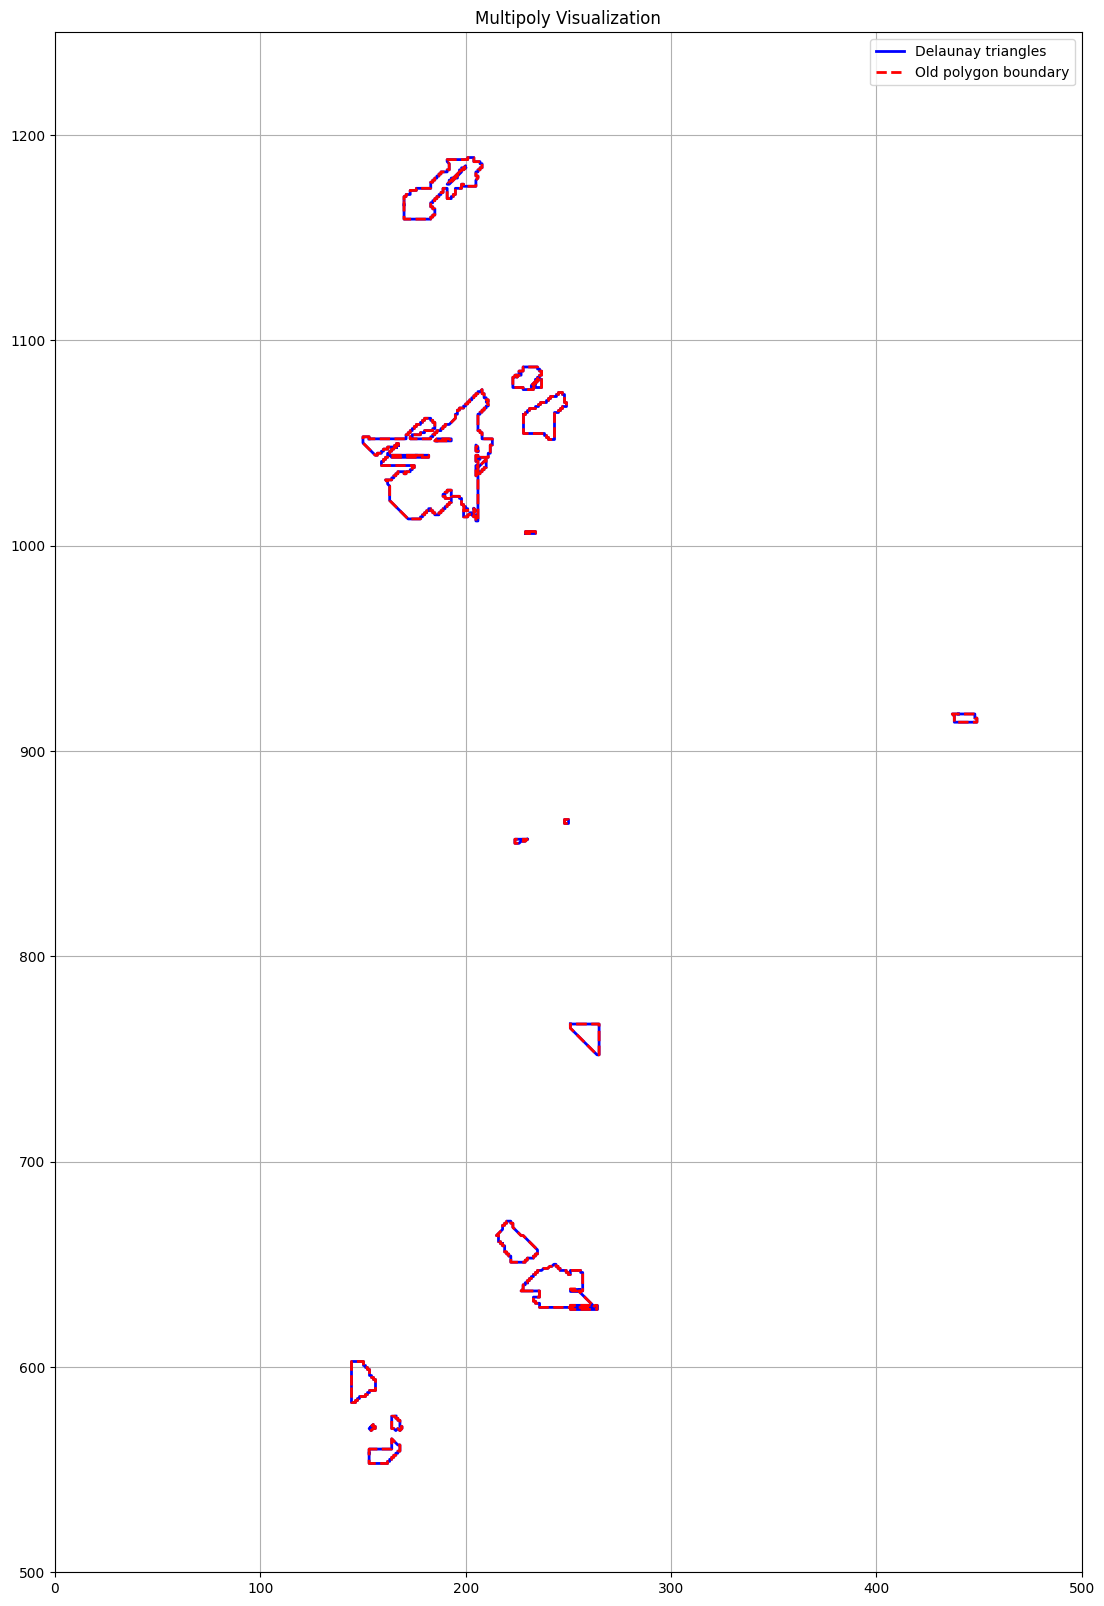

In [ ]:
# plot result
plotMultipolygon(new_multi, multi, (0,500), (500,1250))